# Course Recommender: Exploratory Data Analysis

This project implements and deploys an AI course Recommender System using [Streamlit](https://streamlit.io/). It was inspired by the the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning) offered by IBM & Coursera. In the last course/module of the Specialization, Machine Learning Capstone, a similar application is built; check my [class notes](https://github.com/mxagar/machine_learning_ibm/tree/main/06_Capstone_Project/06_Capstone_Recommender_System.md) for more information.

This notebook performs an **Exploratory Data Analysis (EDA)** of the dataset. You can open it in Google Colab:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mxagar/course_recommender_streamlit/blob/main/notebooks/01_EDA.ipynb)

Table of contents:

- [1. Load Datasets and First Exposure](#1.-Load-Datasets-and-First-Exposure)
    - [1.1 Word Cloud](#1.1-Word-Cloud)
- [2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    - Course Topics
    - Student Enrollments
    - Most Popular Courses

## 1. Load Datasets and First Exposure

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
course_df = pd.read_csv('../data/course_genre.csv')
ratings_df = pd.read_csv('../data/ratings.csv')

In [6]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [7]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [11]:
# 307 courses, each with 16 features: 2 (id, title) + 14 (topic binary variables)
course_df.shape

(307, 16)

In [17]:
# 233306 ratings each with 3 features: user id, course id, rating
ratings_df.shape

(233306, 3)

In [19]:
# One course might have several topics
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

In [22]:
# Each user might have several ratings
ratings_df.groupby('user').count()['item']

user
2          61
4          44
5          59
7           1
8           3
           ..
2102054     8
2102356     1
2102680    11
2102983     1
2103039     1
Name: item, Length: 33901, dtype: int64

In [14]:
# Courses: No nulls, clean data
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   COURSE_ID        307 non-null    object
 1   TITLE            307 non-null    object
 2   Database         307 non-null    int64 
 3   Python           307 non-null    int64 
 4   CloudComputing   307 non-null    int64 
 5   DataAnalysis     307 non-null    int64 
 6   Containers       307 non-null    int64 
 7   MachineLearning  307 non-null    int64 
 8   ComputerVision   307 non-null    int64 
 9   DataScience      307 non-null    int64 
 10  BigData          307 non-null    int64 
 11  Chatbot          307 non-null    int64 
 12  R                307 non-null    int64 
 13  BackendDev       307 non-null    int64 
 14  FrontendDev      307 non-null    int64 
 15  Blockchain       307 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 38.5+ KB


In [16]:
# Ratings: No nulls, clean data
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233306 entries, 0 to 233305
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   user    233306 non-null  int64  
 1   item    233306 non-null  object 
 2   rating  233306 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.3+ MB


### 1.1 Word Cloud

In [23]:
# Join all titles into a single string
# Then, create a word cloud
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [25]:
# English Stopwords: Defined in wordlcloud
stopwords = set(STOPWORDS)
# Custom stop words: common but uninteresting words from titles
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [26]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [27]:
wordcloud.generate(titles)

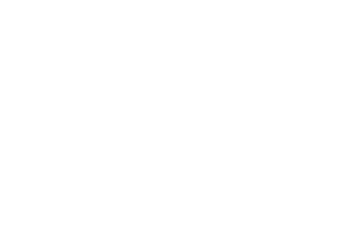

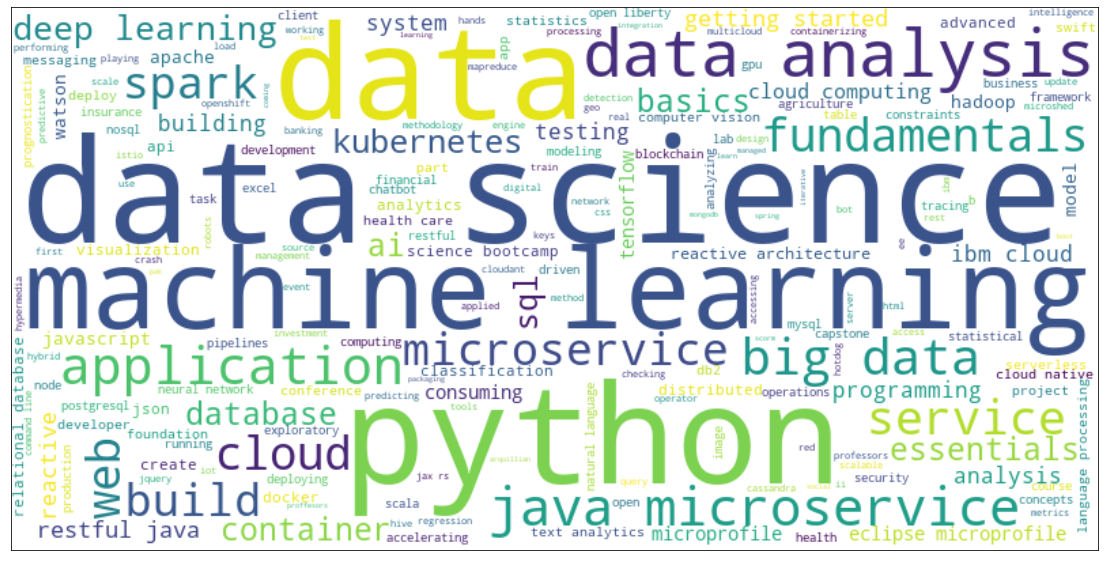

In [35]:
plt.axis("off")
plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
fig = plt.gca()
fig.get_xaxis().set_visible(False)
fig.get_yaxis().set_visible(False)
plt.savefig("../assets/word_cloud.png", bbox_inches='tight')
plt.show()

## 2. Exploratory Data Analysis

### Course Topics

In [47]:
# Topics
topics = list(course_df.columns[2:])
print(topics)

['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision', 'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain']


In [43]:
# Courses with topic MachineLearning
course_df.loc[course_df.MachineLearning==1].shape[0]

69

In [45]:
# Courses with topic MachineLearning + BigData
course_df.loc[(course_df.MachineLearning==1) & (course_df.BigData==1)].shape[0]

4

In [50]:
# Top topics
top_topics = course_df[topics].sum().sort_values(ascending=False)
top_topics

BackendDev         78
MachineLearning    69
Database           60
DataAnalysis       56
DataScience        38
CloudComputing     37
BigData            36
Python             28
FrontendDev        19
Containers         17
R                  17
ComputerVision     10
Chatbot             4
Blockchain          4
dtype: int64

<AxesSubplot:>

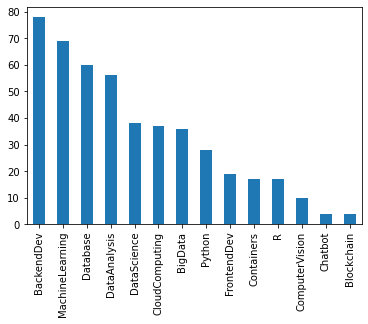

In [51]:
top_topics.plot(kind='bar')

### Student Enrollments

In [53]:
# There are only 2 ratings!
# - 2: the user just audited the course without completing
# - 3: the user completed the course and earned a certificate
# Two other possible values are not explicitly available in this project:
# - 0 or NA: the user has no interaction with the course and 
# - 1: the user just browsed the course.
ratings_df['rating'].unique()

array([3., 2.])

In [54]:
# Mean rating of each user
ratings_df.groupby('user').mean()

,rating
user,
2,2.704918
4,2.000000
5,2.000000
7,2.000000
8,2.000000
...,...
2102054,3.000000
2102356,2.000000
2102680,2.909091


Text(0, 0.5, 'number of students')

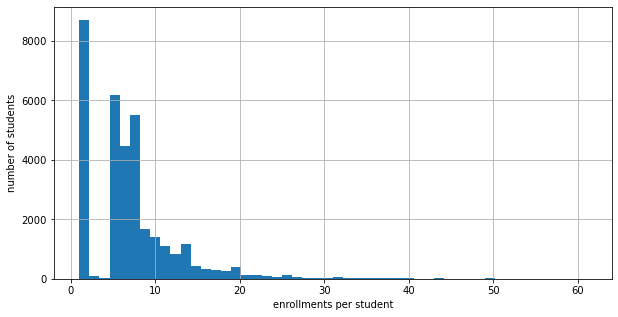

In [57]:
# Histogram of number of courses to which a student is exposed
rating_counts = ratings_df.groupby('user').count()['rating']
plt.figure(figsize=(10,5))
rating_counts.hist(bins=50)
plt.xlabel('enrollments per student')
plt.ylabel('number of students')

### Most Popular Courses

In [59]:
# Top 20 courses, i.e., the ones with most enrollments
popular_courses = pd.DataFrame(ratings_df.groupby('item').size().sort_values(ascending=False)[:20]).reset_index()
popular_courses.columns = ['course', 'enrollments']
popular_courses

,course,enrollments
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
5,DS0103EN,7719
6,ML0101ENv3,7644
7,BD0211EN,7551
8,DS0105EN,7199
9,BC0101EN,6719


In [60]:
# The names of the top 20 most enrolled courses
# We need to do an inner join!
popular_courses_ = pd.merge(left=popular_courses,
         right=course_df,
         how='inner',
         left_on='course',
         right_on='COURSE_ID')[['course', 'enrollments', 'TITLE']]
popular_courses_

,course,enrollments,TITLE
0,PY0101EN,14936,python for data science
1,DS0101EN,14477,introduction to data science
2,BD0101EN,13291,big data 101
3,BD0111EN,10599,hadoop 101
4,DA0101EN,8303,data analysis with python
5,DS0103EN,7719,data science methodology
6,ML0101ENv3,7644,machine learning with python
7,BD0211EN,7551,spark fundamentals i
8,DS0105EN,7199,data science hands on with open source tools
9,BC0101EN,6719,blockchain essentials


In [61]:
top = popular_courses_['enrollments'].sum(axis=0)
total = ratings_df.shape[0]
print(f"Percentage of the top course enrollments: {round((top * 100)/total, 2)}%.")

Percentage of the top course enrollments: 63.3%.


In [63]:
print(f"Total number of courses in the ratings: {len(ratings_df['item'].unique())}.")

Total number of courses in the ratings: 126.
